# Train Delay Prediction

### CONTEXT


Train delays are a significant issue in the railway industry, causing inconvenience to passengers and financial losses for railway operators.
Delays can occur due to various reasons such as signal failures, technical issues, weather conditions, and staffing shortages.
Predicting whether a train journey will be "On Time" or "Delayed" can help railway operators manage resources more effectively and improve passenger satisfaction.

The dataset provided contains historical booking and journey data, including details such as purchase date and time, ticket type, departure and arrival stations, journey status, and reasons for delays.
By analyzing this data, we can build a predictive model to classify train journeys as "On Time" or "Delayed."

### PROBLEM STATEMENT


Using the provided dataset, the goal is to predict whether a train journey will be "On Time" or "Delayed." 


### CONTENT



The dataset includes the following features:

Transaction ID: Unique identifier for each transaction.

Date of Purchase: The date when the ticket was purchased.

Time of Purchase: The time when the ticket was purchased.

Purchase Type: The method of purchase (e.g., Online, Station).

Payment Method: The payment method used (e.g., Credit Card, Contactless).

Railcard: Type of railcard used (e.g., Adult, Disabled).

Ticket Class: Class of the ticket (e.g., Standard, First Class).

Ticket Type: Type of ticket (e.g., Advance, Off-Peak).

Price: The price of the ticket.

Departure Station: The station where the journey starts.

Arrival Destination: The station where the journey ends.

Date of Journey: The date of the train journey.

Departure Time: The scheduled departure time.

Arrival Time: The scheduled arrival time.

Actual Arrival Time: The actual arrival time.

Journey Status: The status of the journey (e.g., On Time, Delayed).

Reason for Delay: The reason for the delay, if any.

Refund Request: Whether a refund was requested.

#### Dataset Overview:


Rows: 31,653

Columns: 18

Target Variable: Journey Status (values: "On Time" or "Delayed")

# DATA EXPLORATION

#### Importing Libraries

In [1]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
sns.set(style="whitegrid")

##### Loading dataset

In [3]:
df = pd.read_csv("railway.csv")

# Display basic information
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

(None,
             Transaction ID Date of Purchase Time of Purchase Purchase Type  \
 0  da8a6ba8-b3dc-4677-b176       2023-12-08         12:41:11        Online   
 1  b0cdd1b0-f214-4197-be53       2023-12-16         11:23:01       Station   
 2  f3ba7a96-f713-40d9-9629       2023-12-19         19:51:27        Online   
 3  b2471f11-4fe7-4c87-8ab4       2023-12-20         23:00:36       Station   
 4  2be00b45-0762-485e-a7a3       2023-12-27         18:22:56        Online   
 
   Payment Method Railcard Ticket Class Ticket Type  Price  \
 0    Contactless    Adult     Standard     Advance     43   
 1    Credit Card    Adult     Standard     Advance     23   
 2    Credit Card      NaN     Standard     Advance      3   
 3    Credit Card      NaN     Standard     Advance     13   
 4    Contactless      NaN     Standard     Advance     76   
 
        Departure Station    Arrival Destination Date of Journey  \
 0      London Paddington  Liverpool Lime Street      2024-01-01   
 1     

In [4]:
df.shape

(31653, 18)

In [5]:
df.describe()

,Price
count,31653.000000
mean,23.439200
std,29.997628
min,1.000000
25%,5.000000
50%,11.000000
75%,35.000000
max,267.000000


#### Check for duplicate values

In [6]:
duplicate_count = df.duplicated().sum()

#### Check for missing values

In [7]:
missing_values = df.isnull().sum()

duplicate_count, missing_values

(0,
 Transaction ID             0
 Date of Purchase           0
 Time of Purchase           0
 Purchase Type              0
 Payment Method             0
 Railcard               20918
 Ticket Class               0
 Ticket Type                0
 Price                      0
 Departure Station          0
 Arrival Destination        0
 Date of Journey            0
 Departure Time             0
 Arrival Time               0
 Actual Arrival Time     1880
 Journey Status             0
 Reason for Delay       27481
 Refund Request             0
 dtype: int64)

#### Handling Missing Values

In [8]:
# Drop "Reason for Delay" as it's mostly missing
df.drop(columns=['Reason for Delay'], inplace=True)

# Replace "None" in Railcard with "No Railcard"
df['Railcard'] = df['Railcard'].fillna('No Railcard')


# Impute missing values in "Actual Arrival Time" with the scheduled "Arrival Time"
df['Actual Arrival Time'].fillna(df['Arrival Time'], inplace=True)

# Verify missing values are handled
print(df.isnull().sum())

Transaction ID         0
Date of Purchase       0
Time of Purchase       0
Purchase Type          0
Payment Method         0
Railcard               0
Ticket Class           0
Ticket Type            0
Price                  0
Departure Station      0
Arrival Destination    0
Date of Journey        0
Departure Time         0
Arrival Time           0
Actual Arrival Time    0
Journey Status         0
Refund Request         0
dtype: int64


In [9]:
print(df.columns) 

Index(['Transaction ID', 'Date of Purchase', 'Time of Purchase',
       'Purchase Type', 'Payment Method', 'Railcard', 'Ticket Class',
       'Ticket Type', 'Price', 'Departure Station', 'Arrival Destination',
       'Date of Journey', 'Departure Time', 'Arrival Time',
       'Actual Arrival Time', 'Journey Status', 'Refund Request'],
      dtype='object')


In [10]:
df['Journey Status'] = df['Journey Status'].replace('Cancelled','Delayed')

In [11]:
df.shape

(31653, 17)

In [12]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             31653 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  31653 non-null  object
 15  Journey Status       31653 non-null  object
 16  Refu

(None,
             Transaction ID Date of Purchase Time of Purchase Purchase Type  \
 0  da8a6ba8-b3dc-4677-b176       2023-12-08         12:41:11        Online   
 1  b0cdd1b0-f214-4197-be53       2023-12-16         11:23:01       Station   
 2  f3ba7a96-f713-40d9-9629       2023-12-19         19:51:27        Online   
 3  b2471f11-4fe7-4c87-8ab4       2023-12-20         23:00:36       Station   
 4  2be00b45-0762-485e-a7a3       2023-12-27         18:22:56        Online   
 
   Payment Method     Railcard Ticket Class Ticket Type  Price  \
 0    Contactless        Adult     Standard     Advance     43   
 1    Credit Card        Adult     Standard     Advance     23   
 2    Credit Card  No Railcard     Standard     Advance      3   
 3    Credit Card  No Railcard     Standard     Advance     13   
 4    Contactless  No Railcard     Standard     Advance     76   
 
        Departure Station    Arrival Destination Date of Journey  \
 0      London Paddington  Liverpool Lime Street   

## EXPLORATIVE DATA ANALYSIS

#### Univariate Analysis


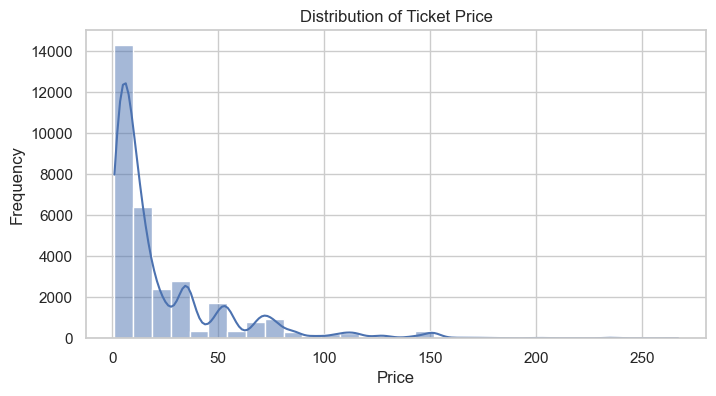

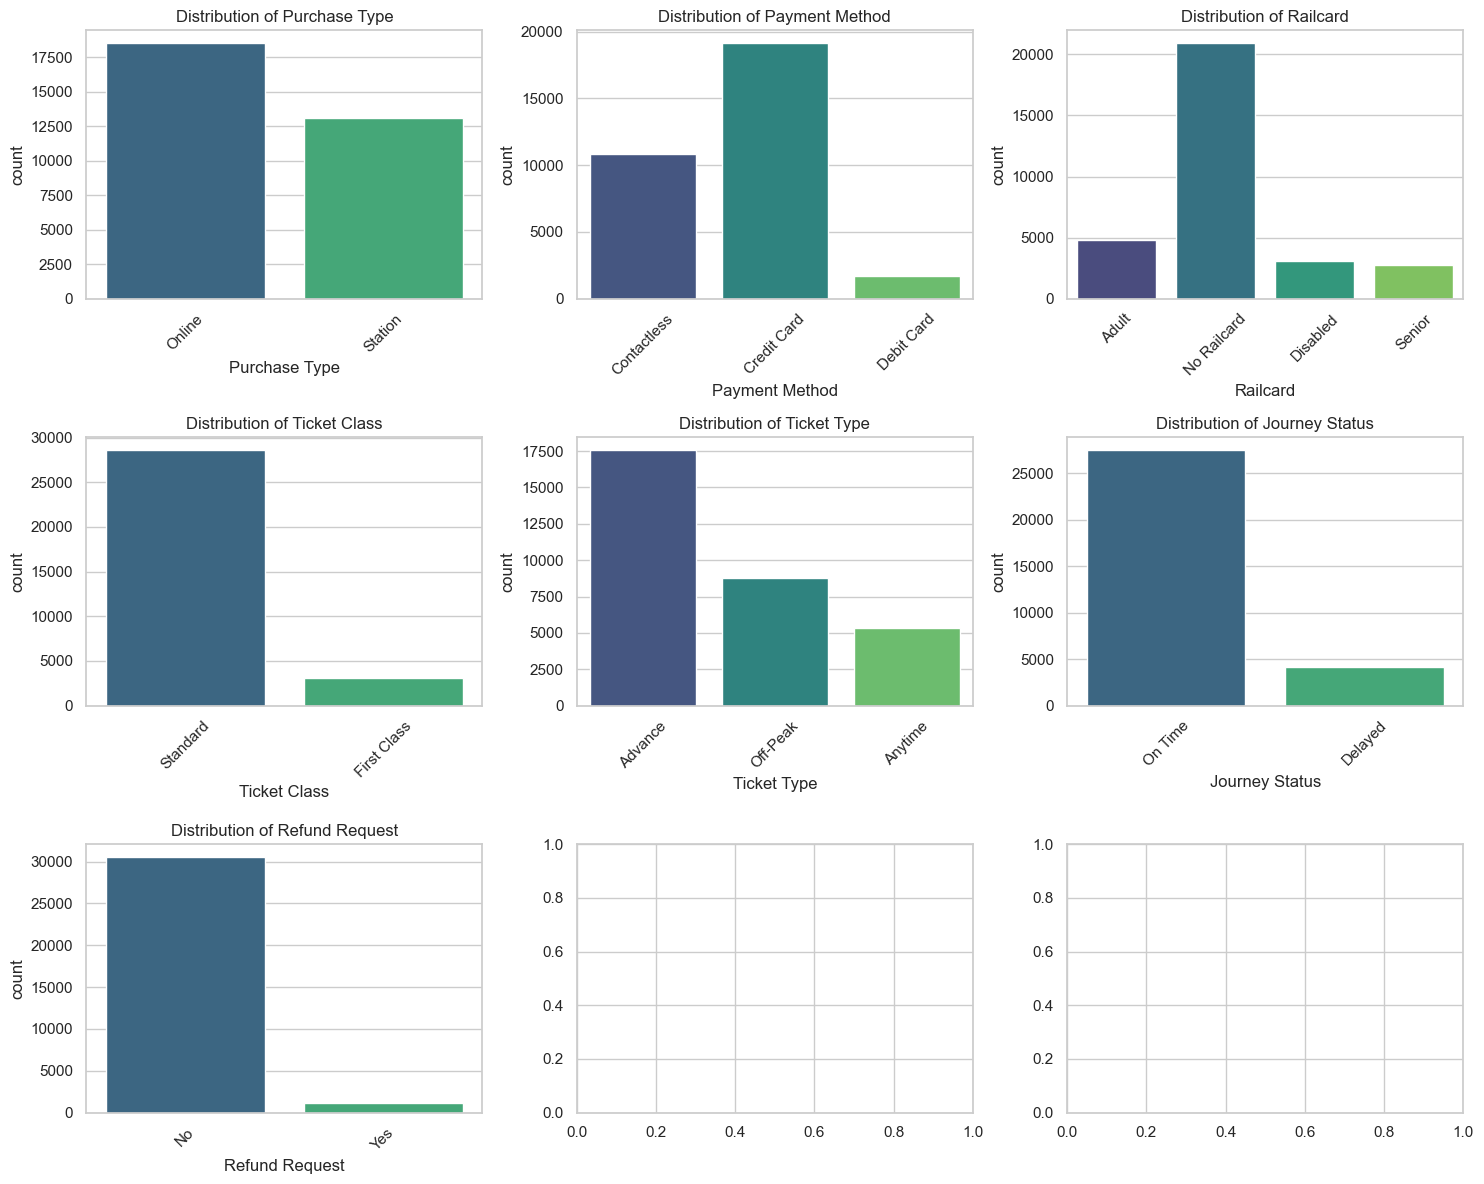

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Define numerical and categorical columns
numerical_columns = ['Price']
categorical_columns = ['Purchase Type', 'Payment Method', 'Railcard', 'Ticket Class', 
                       'Ticket Type', 'Journey Status', 'Refund Request']

# Plot numerical column distributions
plt.figure(figsize=(8, 4))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Ticket Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Plot categorical column distributions
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=df[col], ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Bivariate Analysis

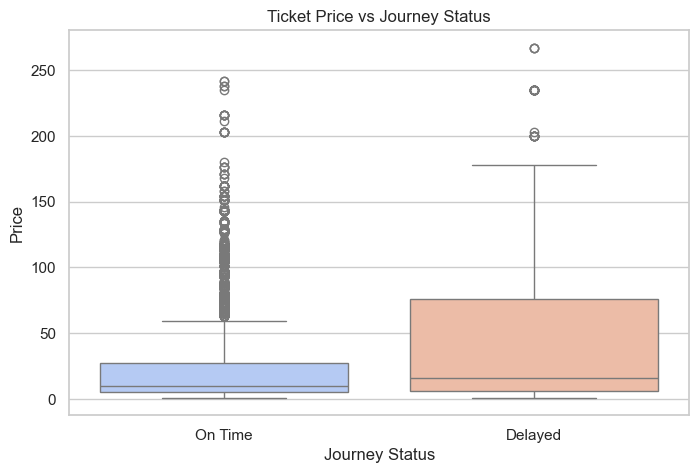

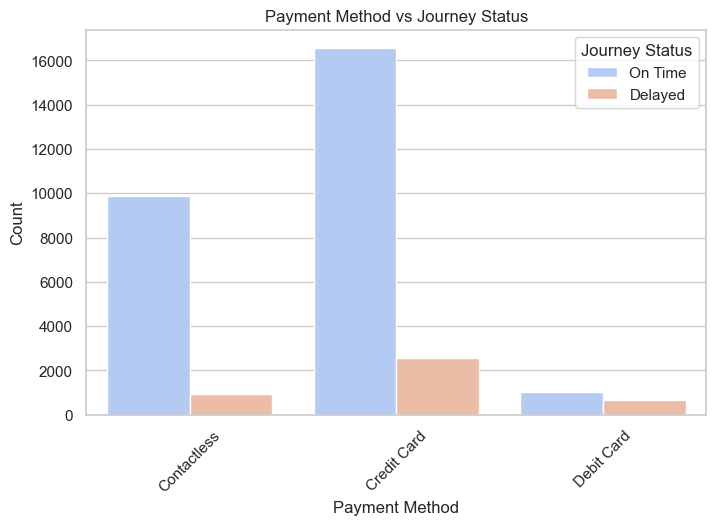

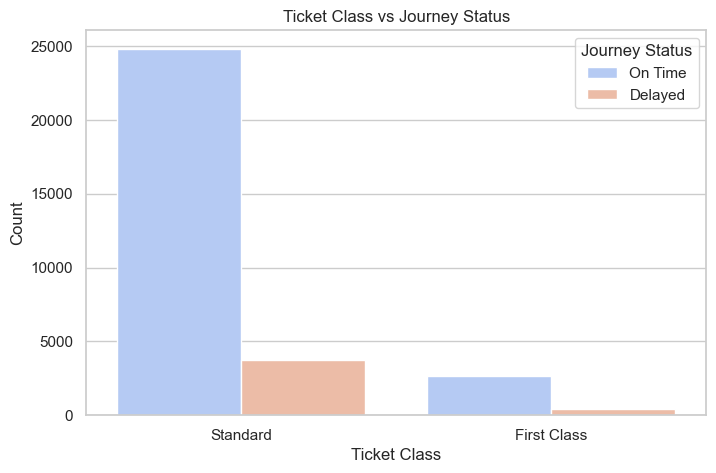

In [14]:
# Bivariate Analysis - Price vs Journey Status
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Journey Status"], y=df["Price"], palette="coolwarm")
plt.title("Ticket Price vs Journey Status")
plt.xlabel("Journey Status")
plt.ylabel("Price")
plt.show()

# Bivariate Analysis - Payment Method vs Journey Status
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Payment Method"], hue=df["Journey Status"], palette="coolwarm")
plt.title("Payment Method vs Journey Status")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Bivariate Analysis - Ticket Class vs Journey Status
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Ticket Class"], hue=df["Journey Status"], palette="coolwarm")
plt.title("Ticket Class vs Journey Status")
plt.xlabel("Ticket Class")
plt.ylabel("Count")
plt.show()

##### Outlier Detection and Removel using Box plots

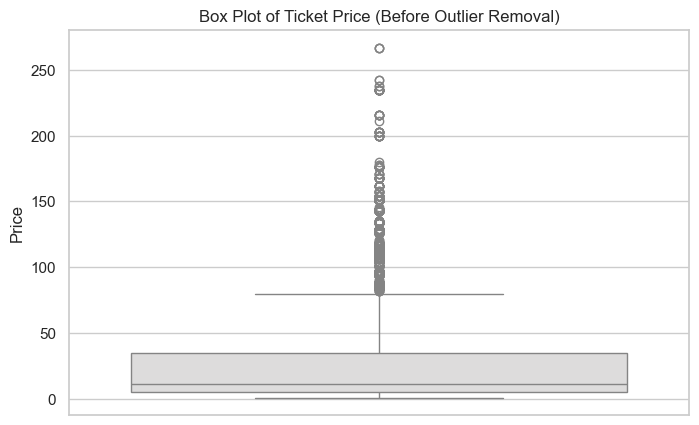

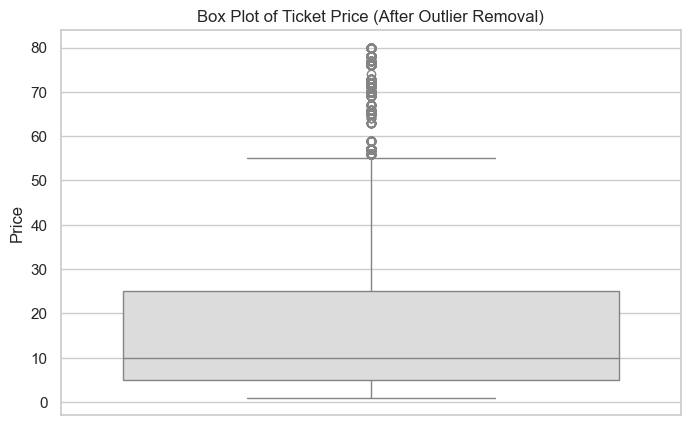

1555

In [15]:
# Box Plot before Outlier Detection
plt.figure(figsize=(8, 5))
sns.boxplot(y=df["Price"], palette="coolwarm")
plt.title("Box Plot of Ticket Price (Before Outlier Removal)")
plt.ylabel("Price")
plt.show()

# Detect Outliers using IQR
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df["Price"] >= lower_bound) & (df["Price"] <= upper_bound)]

# Box Plot after Outlier Removal
plt.figure(figsize=(8, 5))
sns.boxplot(y=df_cleaned["Price"], palette="coolwarm")
plt.title("Box Plot of Ticket Price (After Outlier Removal)")
plt.ylabel("Price")
plt.show()

# Display number of rows removed
outliers_removed = df.shape[0] - df_cleaned.shape[0]
outliers_removed

#### Before removal: The box plot showed extreme values in ticket prices.

#### After removal: The outliers were successfully removed, making the data distribution more reliable.

#### Total outliers removed: 1,555 rows.

### Skewness and Kurtosis Analysis:

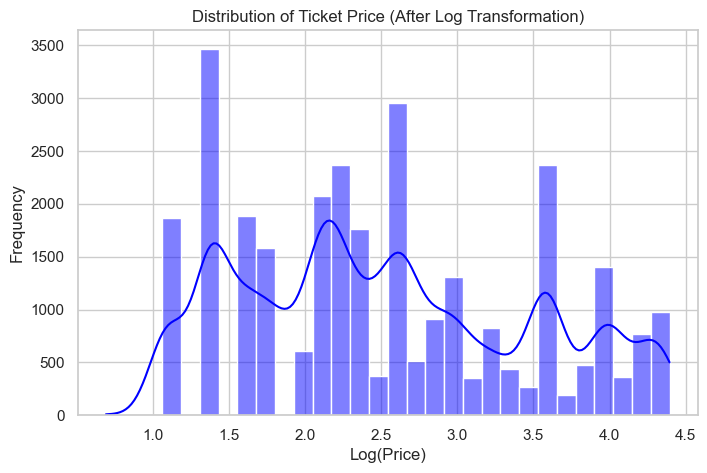

((1.5393069545166584, 1.4271654000389358),
 (0.31903375450172267, -0.9484152232194978))

In [16]:
import numpy as np

# Skewness and Kurtosis before transformation
skewness_before = df_cleaned["Price"].skew()
kurtosis_before = df_cleaned["Price"].kurtosis()

# Apply log transformation to reduce skewness
df_cleaned["Price"] = np.log1p(df_cleaned["Price"])

# Skewness and Kurtosis after transformation
skewness_after = df_cleaned["Price"].skew()
kurtosis_after = df_cleaned["Price"].kurtosis()

# Plot distribution after transformation
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["Price"], bins=30, kde=True, color="blue")
plt.title("Distribution of Ticket Price (After Log Transformation)")
plt.xlabel("Log(Price)")
plt.ylabel("Frequency")
plt.show()

(skewness_before, kurtosis_before), (skewness_after, kurtosis_after)

Before Transformation:

Skewness = 1.54 (right-skewed)

Kurtosis = 1.43 (peaked distribution)

After Log Transformation:

Skewness = 0.32 (closer to normal distribution)

Kurtosis = -0.95 (more balanced spread)

The transformation successfully reduced skewness.

## ENCODING

In [17]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_columns = ['Purchase Type', 'Payment Method', 'Railcard', 'Ticket Class', 
                       'Ticket Type', 'Departure Station', 'Arrival Destination', 
                       'Refund Request', 'Journey Status']

# Apply Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Display encoded dataset sample
df_cleaned.head(10)

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,0,0,0,1,0,3.784190,6,12,2024-01-01,11:00:00,13:30:00,13:30:00,1,0
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,1,1,0,1,0,3.178054,5,31,2024-01-01,09:45:00,11:35:00,11:40:00,0,0
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,0,1,2,1,0,1.386294,3,18,2024-01-02,18:15:00,18:45:00,18:45:00,1,0
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,1,1,2,1,0,2.639057,6,23,2024-01-01,21:30:00,22:30:00,22:30:00,1,0
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,0,0,2,1,0,4.343805,3,13,2024-01-01,16:45:00,19:00:00,19:00:00,1,0
5,4e1dcd88-3d95-44ef-99fa,2023-12-30,07:56:06,0,1,2,1,0,3.583519,5,31,2024-01-01,06:15:00,08:05:00,08:05:00,1,0
6,1c74479d-85a4-4ba1-a607,2023-12-31,00:02:01,1,1,0,1,0,1.098612,4,21,2024-01-01,22:30:00,23:40:00,23:40:00,1,0
7,febf8dab-f808-46fa-bf2b,2023-12-31,01:35:18,1,0,1,1,0,1.098612,3,18,2024-01-01,00:00:00,00:30:00,00:30:00,1,0
8,01df916f-4291-41ec-a37d,2023-12-31,01:43:09,1,1,2,1,0,3.637586,4,31,2024-01-01,00:00:00,01:50:00,02:07:00,0,0
9,a8cedba7-1923-459d-b046,2023-12-31,03:05:52,0,1,2,1,0,2.639057,6,23,2024-01-01,01:30:00,02:30:00,02:30:00,1,0


### FEATURE SELECTION

In [18]:
# Drop non-relevant columns (Transaction ID, Date & Time columns)
df_selected = df_cleaned.drop(columns=[
    'Transaction ID', 'Date of Purchase', 'Time of Purchase', 
    'Date of Journey', 'Departure Time', 'Arrival Time', 'Actual Arrival Time'
])

# Define target variable (Journey Status) and features
X = df_selected.drop(columns=['Journey Status'])
y = df_selected['Journey Status']

# Display final feature set
X.head()

,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Refund Request
0,0,0,0,1,0,3.784190,6,12,0
1,1,1,0,1,0,3.178054,5,31,0
2,0,1,2,1,0,1.386294,3,18,0
3,1,1,2,1,0,2.639057,6,23,0
4,0,0,2,1,0,4.343805,3,13,0


### Splitting the Dataset

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 11: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 12: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shape of training and testing sets
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((24078, 9), (6020, 9), (24078,), (6020,))

### We can understand that there is class imbalance,So i used smote for resolve it.

In [20]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Display class distribution before SMOTE
print("Before SMOTE:")
print("Training set class distribution:", np.bincount(y_train))
print("Testing set class distribution:", np.bincount(y_test))

# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Display class distribution after SMOTE
print("\nAfter SMOTE:")
print("Resampled training set class distribution:", np.bincount(y_train_resampled))
print("Testing set class distribution remains the same:", np.bincount(y_test))

# Display shapes
print("\nShapes:")
print("X_train_resampled:", X_train_resampled.shape)
print("y_train_resampled:", y_train_resampled.shape)
print("X_test_scaled:", X_test_scaled.shape)
print("y_test:", y_test.shape)

Before SMOTE:
Training set class distribution: [ 2794 21284]
Testing set class distribution: [ 698 5322]

After SMOTE:
Resampled training set class distribution: [21284 21284]
Testing set class distribution remains the same: [ 698 5322]

Shapes:
X_train_resampled: (42568, 9)
y_train_resampled: (42568,)
X_test_scaled: (6020, 9)
y_test: (6020,)


### Model Training and Evaluation

In [21]:
# Import classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Dictionary to store results
results = {}

# Train and evaluate each model using the resampled data
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)  # Changed to use resampled data
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Calculate training accuracy using resampled data
    y_train_pred = model.predict(X_train_resampled)
    train_acc = accuracy_score(y_train_resampled, y_train_pred)

    results[name] = {
        "Accuracy": acc,
        "Training Accuracy": train_acc,
        "Classification Report": report,
        "Confusion Matrix": cm
    }

# Print the results in a more readable format
for name, result in results.items():
    print(f"--- {name} ---")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print(f"Training Accuracy: {result['Training Accuracy']:.4f}")
    print("\nClassification Report:")
    print(result['Classification Report'])
    print("\nConfusion Matrix:")
    print(result['Confusion Matrix'])
    print("-" * (len(name) + 7))
    print()

--- Logistic Regression ---
Accuracy: 0.7713
Training Accuracy: 0.6846

Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.60      0.38       698
           1       0.94      0.79      0.86      5322

    accuracy                           0.77      6020
   macro avg       0.61      0.70      0.62      6020
weighted avg       0.86      0.77      0.80      6020


Confusion Matrix:
[[ 417  281]
 [1096 4226]]
--------------------------

--- Random Forest ---
Accuracy: 0.8299
Training Accuracy: 0.8146

Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.70      0.49       698
           1       0.96      0.85      0.90      5322

    accuracy                           0.83      6020
   macro avg       0.66      0.77      0.69      6020
weighted avg       0.89      0.83      0.85      6020


Confusion Matrix:
[[ 486  212]
 [ 812 4510]]
--------------------

--- Gradient Boostin

#####  All models show a good performence.I took Random Forest as my top model,because random forest strikes a good balance between 
#####  metrices.Recall value over minority class (0) is hightest among all other models,which is the goal of this project.

##### Next i will perform hyperparameter tuning and look for further improvement then i will create a pipeline.


### Hyper parameter tuning

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint, uniform

# Define the parameter distributions to sample from
param_distributions = {
    'n_estimators': randint(100, 500),       # Number of trees (range between 100 and 500)
    'max_depth': [None] + list(randint(10, 50).rvs(10)), # Max depth (None or a random integer between 10 and 50)
    'min_samples_split': randint(2, 20),    # Min samples to split (range between 2 and 20)
    'min_samples_leaf': randint(1, 10),     # Min samples in a leaf (range between 1 and 10)
    'max_features': ['sqrt', 'log2', None, 0.5, 0.7], # Number or proportion of features to consider
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', 'balanced_subsample'] # Weights for imbalanced classes
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV with n_iter=20
random_search_iter_20 = RandomizedSearchCV(estimator=rf,
                                            param_distributions=param_distributions,
                                            n_iter=20,          # Increased n_iter to 20
                                            cv=3,               # Number of cross-validation folds
                                            scoring='accuracy', # Metric to optimize
                                            n_jobs=-1,          # Use all available CPU cores
                                            verbose=2,
                                            random_state=42)   # For reproducibility

# Fit RandomizedSearchCV to the resampled training data
random_search_iter_20.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters found
print("\n--- RandomizedSearchCV with n_iter=20 ---")
print("Best Hyperparameters:", random_search_iter_20.best_params_)

# Get the best model
best_rf_random_iter_20 = random_search_iter_20.best_estimator_

# Evaluate the best model on the test set
y_pred_random_best_iter_20 = best_rf_random_iter_20.predict(X_test_scaled)
accuracy_random_best_iter_20 = accuracy_score(y_test, y_pred_random_best_iter_20)
report_random_best_iter_20 = classification_report(y_test, y_pred_random_best_iter_20)
cm_random_best_iter_20 = confusion_matrix(y_test, y_pred_random_best_iter_20)

print(f"Accuracy on Test Set: {accuracy_random_best_iter_20:.4f}")
print("\nClassification Report on Test Set:")
print(report_random_best_iter_20)
print("\nConfusion Matrix on Test Set:")
print(cm_random_best_iter_20)
print("-" * 44)

Fitting 3 folds for each of 20 candidates, totalling 60 fits

--- RandomizedSearchCV with n_iter=20 ---
Best Hyperparameters: {'bootstrap': False, 'class_weight': 'balanced_subsample', 'max_depth': 43, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 230}
Accuracy on Test Set: 0.8397

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.39      0.69      0.50       698
           1       0.95      0.86      0.90      5322

    accuracy                           0.84      6020
   macro avg       0.67      0.77      0.70      6020
weighted avg       0.89      0.84      0.86      6020


Confusion Matrix on Test Set:
[[ 480  218]
 [ 747 4575]]
--------------------------------------------


By doing hyperparameter tuning there is a slight improvement on the model

### Pipeline Building

In [23]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the pipeline with optimized Random Forest parameters
rf_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(
        bootstrap=False,
        class_weight='balanced_subsample',
        max_depth=49,
        max_features='sqrt',
        min_samples_leaf=3,
        min_samples_split=6,
        n_estimators=230,
        random_state=42
    ))
])

# Fit the pipeline
rf_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_pipeline = rf_pipeline.predict(X_test)

# Evaluate model
print(f"Optimized Random Forest Pipeline Accuracy: {accuracy_score(y_test, y_pred_pipeline):.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred_pipeline))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_pipeline))

Optimized Random Forest Pipeline Accuracy: 0.8397

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.69      0.50       698
           1       0.95      0.86      0.90      5322

    accuracy                           0.84      6020
   macro avg       0.67      0.77      0.70      6020
weighted avg       0.89      0.84      0.86      6020

Confusion Matrix:
 [[ 480  218]
 [ 747 4575]]


In [24]:
from joblib import dump

# Save the entire pipeline to a file
dump(rf_pipeline, 'trained_pipeline.joblib') 

# Later, you can load it back with:
# from joblib import load
# rf_pipeline = load('trained_pipeline.joblib')

['trained_pipeline.joblib']

### Testing Unseen Data

In [25]:
# Loading unseen data
unseen_data = df.sample(n=2000, random_state=42)
unseen_data

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Refund Request
20169,5cba8154-329e-4670-805b,2024-03-17,20:26:33,Station,Debit Card,Senior,Standard,Advance,48,London Euston,Manchester Piccadilly,2024-03-18,18:45:00,20:35:00,20:35:00,On Time,No
3100,cc742a5e-bce6-440e-96f1,2024-01-13,05:11:37,Online,Credit Card,No Railcard,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-01-13,06:30:00,07:50:00,07:50:00,On Time,No
2932,2c1cd8e6-031d-498a-9acd,2024-01-12,13:33:25,Online,Contactless,No Railcard,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-13,12:00:00,12:30:00,12:30:00,On Time,No
30141,f0af694a-c145-4cc0-8e61,2024-04-24,20:24:26,Station,Credit Card,No Railcard,Standard,Advance,5,Birmingham New Street,Stafford,2024-04-25,17:45:00,18:15:00,18:15:00,On Time,No
10951,940e0228-3b63-4afd-b9dc,2024-02-06,21:06:22,Station,Contactless,No Railcard,First Class,Advance,57,London Kings Cross,York,2024-02-14,19:30:00,21:20:00,21:20:00,On Time,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22543,784867c6-4ed5-4b21-8a90,2024-03-26,12:20:16,Online,Credit Card,Adult,Standard,Off-Peak,4,Manchester Piccadilly,Sheffield,2024-03-26,13:45:00,14:30:00,14:30:00,On Time,No
21005,aaffe9f2-7b53-48bc-9ae4,2024-03-20,21:36:09,Station,Credit Card,No Railcard,First Class,Advance,27,London Paddington,Reading,2024-03-21,20:00:00,21:00:00,21:00:00,On Time,No
20408,d94d7470-a0a2-4472-b044,2024-03-18,17:25:17,Online,Debit Card,Senior,Standard,Anytime,5,Reading,Didcot,2024-03-18,18:45:00,19:00:00,19:00:00,On Time,No
30800,4007d372-4794-41b9-b13f,2024-04-27,08:14:16,Online,Credit Card,No Railcard,Standard,Advance,35,London Kings Cross,York,2024-04-28,07:30:00,09:20:00,09:20:00,Delayed,No


In [26]:
print("\t")
print(f"The shape of the dataset before removing the duplicates is {unseen_data.shape}")

	
The shape of the dataset before removing the duplicates is (2000, 17)


In [27]:
duplicate_count = unseen_data.duplicated().sum()

In [28]:
duplicate_count 

0

In [29]:
unseen_data.shape

(2000, 17)

In [30]:
missing_values = unseen_data.isnull().sum()

In [31]:
missing_values

Transaction ID         0
Date of Purchase       0
Time of Purchase       0
Purchase Type          0
Payment Method         0
Railcard               0
Ticket Class           0
Ticket Type            0
Price                  0
Departure Station      0
Arrival Destination    0
Date of Journey        0
Departure Time         0
Arrival Time           0
Actual Arrival Time    0
Journey Status         0
Refund Request         0
dtype: int64

#### Encoding

In [32]:
# Apply the previously fitted LabelEncoders to unseen_data
for col in categorical_columns:
    if col in unseen_data.columns:
        le = label_encoders[col]
        unseen_data[col] = le.transform(unseen_data[col])

In [33]:
print(unseen_data.columns)

Index(['Transaction ID', 'Date of Purchase', 'Time of Purchase',
       'Purchase Type', 'Payment Method', 'Railcard', 'Ticket Class',
       'Ticket Type', 'Price', 'Departure Station', 'Arrival Destination',
       'Date of Journey', 'Departure Time', 'Arrival Time',
       'Actual Arrival Time', 'Journey Status', 'Refund Request'],
      dtype='object')


In [34]:
print(unseen_data.head(100))

                Transaction ID Date of Purchase Time of Purchase  \
20169  5cba8154-329e-4670-805b       2024-03-17         20:26:33   
3100   cc742a5e-bce6-440e-96f1       2024-01-13         05:11:37   
2932   2c1cd8e6-031d-498a-9acd       2024-01-12         13:33:25   
30141  f0af694a-c145-4cc0-8e61       2024-04-24         20:24:26   
10951  940e0228-3b63-4afd-b9dc       2024-02-06         21:06:22   
...                        ...              ...              ...   
18114  871ce0d1-28e8-4067-af6b       2024-03-10         06:31:41   
29507  44bf9056-1078-4018-bcb2       2024-04-22         13:32:38   
22027  6aab225a-90e9-4b34-8558       2024-03-24         17:17:50   
30707  6fa811e9-06cc-46f2-a402       2024-04-27         00:59:43   
29308  aeadb8ac-314c-4b39-b2d7       2024-04-21         18:18:59   

       Purchase Type  Payment Method  Railcard  Ticket Class  Ticket Type  \
20169              1               2         3             1            0   
3100               0         

#### Feature Selection

In [35]:
# Apply same preprocessing 
unseen_data_selected = unseen_data.drop(columns=[
    'Transaction ID', 'Date of Purchase', 'Time of Purchase', 
    'Date of Journey', 'Departure Time', 'Arrival Time', 'Actual Arrival Time'
])


X_unseen = unseen_data_selected.drop(columns=['Journey Status'])
y_unseen = unseen_data_selected['Journey Status']



y_unseen.head()

20169    1
3100     1
2932     1
30141    1
10951    1
Name: Journey Status, dtype: int32

In [36]:
X_unseen.head()

,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Refund Request
20169,1,2,3,1,0,48,4,18,0
3100,0,1,2,1,2,10,4,0,0
2932,0,0,2,1,0,3,3,18,0
30141,1,1,2,1,0,5,0,25,0
10951,1,0,2,0,0,57,5,31,0


In [37]:
# train-test-split

X_unseen_train, X_unseen_test, y_unseen_train, y_unseen_test = train_test_split(
    X_unseen, y_unseen, test_size=0.2, random_state=42, stratify=y_unseen
)


# Display the Shape of Split Data
print("Training Set Shape:", X_unseen_train.shape)
print("Testing Set Shape:", X_unseen_test.shape)

Training Set Shape: (1600, 9)
Testing Set Shape: (400, 9)


In [38]:
print(y_unseen_train.shape)
print(y_unseen_test.shape)

(1600,)
(400,)


In [39]:
print("Training set class distribution (percentage):")
print(y_unseen_train.value_counts(normalize=True) * 100)

print("\nTest set class distribution (percentage):")
print(y_unseen_test.value_counts(normalize=True) * 100)

Training set class distribution (percentage):
Journey Status
1    88.625
0    11.375
Name: proportion, dtype: float64

Test set class distribution (percentage):
Journey Status
1    88.75
0    11.25
Name: proportion, dtype: float64


In [40]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_unseen_resampled, y_unseen_resampled = smote.fit_resample(X_unseen_train, y_unseen_train)

# Check class distribution before and after SMOTE
print("Class distribution before SMOTE:", Counter(y_unseen_train))
print("Class distribution after SMOTE:", Counter(y_unseen_resampled))

Class distribution before SMOTE: Counter({1: 1418, 0: 182})
Class distribution after SMOTE: Counter({1: 1418, 0: 1418})


In [41]:
rf_pipeline.fit(X_unseen_train, y_unseen_train)
y_pred_unseen_rf_pipeline = rf_pipeline.predict(X_unseen_test)

print(f"rf Pipeline Model Accuracy: {accuracy_score(y_unseen_test, y_pred_unseen_rf_pipeline) * 100:.2f}%")

rf Pipeline Model Accuracy: 93.50%


In [42]:
# Load the best model from a file
import joblib
model_filename = 'trained_pipeline.joblib'
loaded_model = joblib.load(model_filename)

In [43]:
# Make predictions on unseen data
predictions = loaded_model.predict(X_unseen)

In [47]:
# Output predictions
print("Predictions on Unseen Data:", predictions[:50])

Predictions on Unseen Data: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 1]


### For testing the Random forest model pipeline,i randomely selected some instances from dataset as unseen data and perform all data preprocessing and other steps thats done for pipeline building.The pipeline shoowed a accuracy of (rf Pipeline Model Accuracy: 93.50%) which is very good and competent.The pipeline can used for predictions on similar datasets 

##  LIMITATIONS


 * Class Imbalance: The initial dataset exhibited a significant class imbalance, with far fewer instances of class 0 compared to class 1. While SMOTE was used to address this during training, the inherent imbalance might still affect model performance, particularly on the minority class.
 * Performance on Minority Class: Despite using SMOTE and hyperparameter tuning, the precision and F1-score for the minority class (0) consistently remained lower than for the majority class (1) across different models. This indicates that the model still struggles more with correctly identifying and classifying the minority class.
 * Limited Exploration of Other Models: While several models were initially evaluated, the focus quickly narrowed to Random Forest. Other potentially well-suited algorithms for imbalanced datasets (e.g., other ensemble methods like BalancedRandomForestClassifier or AdaBoost, or cost-sensitive learning approaches) were not explored in depth.

### FUTURE IMPROVEMENTS


 * Advanced Resampling Techniques: Explore more sophisticated resampling methods beyond basic SMOTE. This could include:
   * ADASYN (Adaptive Synthetic Sampling): Generates more synthetic samples for minority class instances that are harder to classify.
   * Borderline-SMOTE: Focuses on generating synthetic samples for minority class instances near the decision boundary.
   * Combining Oversampling and Undersampling: Techniques like SMOTEENN or SMOTETomek can combine oversampling the minority class with undersampling the majority class to potentially clean the decision boundary.
 * More Extensive Hyperparameter Tuning: Increase the n_iter in RandomizedSearchCV to explore a wider range of hyperparameter combinations. Refine the parameter distributions based on the results obtained so far. Consider using other optimization techniques like Bayesian optimization.

By addressing these limitations and exploring these future improvements, you can potentially build a more robust, accurate, and insightful classification model for your project, especially concerning the challenges posed by the class imbalance.